In [53]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import cv2
import matplotlib.image as mpimg
%matplotlib inline
path = 'sample_images/'

samp = []
with open('forward/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        samp.append(line)
samp_back= []
with open('backward/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        samp_back.append(line)

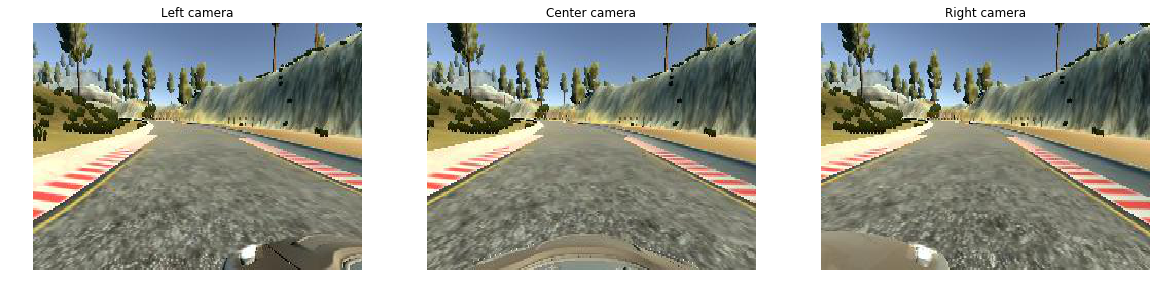

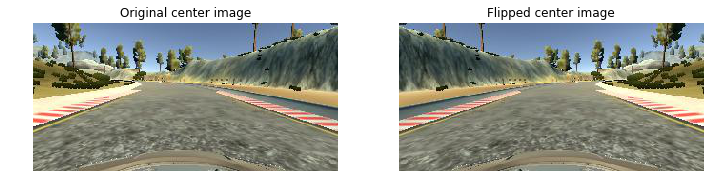

In [40]:
batch_sample = samp[0]
left_name = batch_sample[1].split('\\')[-3] + '/' + batch_sample[1].split('\\')[-2] + '/' +  batch_sample[1].split('\\')[-1]
right_name = batch_sample[2].split('\\')[-3] + '/' + batch_sample[2].split('\\')[-2] + '/' +  batch_sample[2].split('\\')[-1]
name = batch_sample[0].split('\\')[-3] + '/' + batch_sample[0].split('\\')[-2] + '/' +  batch_sample[0].split('\\')[-1]
center_image = plt.imread(name)   
flip_center_image = cv2.flip(center_image,1)
right_image = plt.imread(right_name)   
left_image = plt.imread(left_name)   

fig = plt.figure(figsize=(20, 10))
plt.subplot(2, 3, 1)
plt.imshow(left_image, aspect='auto')
plt.title('Left camera')
plt.axis('off')
plt.subplot(2, 3, 2)
plt.imshow(center_image, aspect='auto')
plt.title('Center camera')
plt.axis('off')
plt.subplot(2, 3, 3)
plt.imshow(right_image, aspect='auto')
plt.title('Right camera')
plt.axis('off')
plt.show()
fig.savefig('images/leftcenterright.jpg')
plt.close(fig)

fig = plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.imshow(center_image, aspect='auto')
plt.title('Original center image')
plt.axis('off')
plt.subplot(2, 2, 2)
plt.imshow(flip_center_image, aspect='auto')
plt.title('Flipped center image')
plt.axis('off')
plt.show()
fig.savefig('images/flipped.jpg')
plt.close(fig)

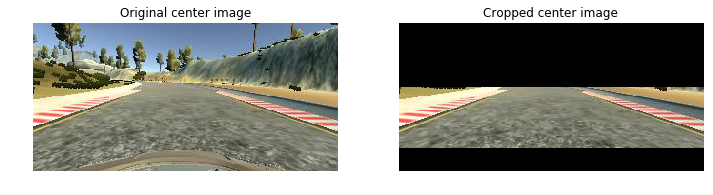

In [35]:
cropped_center_image = center_image.copy()
cropped_center_image[135:,:,:] = 0
cropped_center_image[:70,:,:] = 0

fig = plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.imshow(center_image, aspect='auto')
plt.title('Original center image')
plt.axis('off')
plt.subplot(2, 2, 2)
plt.imshow(cropped_center_image, aspect='auto')
plt.title('Cropped center image')
plt.axis('off')
plt.show()
fig.savefig('images/cropped.jpg')
plt.close(fig)

In [54]:
#images = []
measurement_forward = []
for line in samp:
    source_path = line[0]
    #filename = source_path.split('/')[-1]
    # Windows split
    filename = source_path.split('\\')[-1]
    current_path = 'forward/IMG/' + filename
    
    # TODO check what's the consequence of RGB/BRG
    #image = cv2.imread(current_path)
    #image = plt.imread(current_path)
    #images.append(image)
    measurement = float(line[3])
    measurement_forward.append(measurement)
    
#images = []
measurement_backward = []
for line in samp_back:
    source_path = line[0]
    #filename = source_path.split('/')[-1]
    # Windows split
    filename = source_path.split('\\')[-1]
    current_path = 'backward/IMG/' + filename
    
    # TODO check what's the consequence of RGB/BRG
    #image = cv2.imread(current_path)
    #image = plt.imread(current_path)
    #images.append(image)
    measurement = float(line[3])
    measurement_backward.append(measurement)

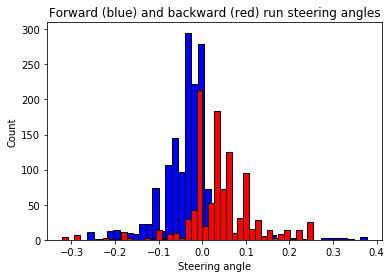

In [61]:
fig, ax = plt.subplots( nrows=1, ncols=1 )
ax.hist(measurement_forward, color = 'blue', edgecolor = 'black',bins = int(43/1)) # Blue train dataset
ax.hist(measurement_backward, color = 'red', edgecolor = 'black',bins = int(43/1)) # Blue train dataset
plt.title('Forward (blue) and backward (red) run steering angles')
plt.xlabel('Steering angle')
plt.ylabel('Count')
plt.show()
fig.savefig('images/steeringhistogram.jpg')
plt.close(fig)